<a href="https://colab.research.google.com/github/ronish645/test_repo/blob/main/Signature_asg_Ronish_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#Load the bike dataset
bike_df = pd.read_csv('bike_day_raw.csv')
bike_df

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [ ]:
#These are the columns in the dataset
bike_df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
# Select a feature as the independent variable (X)
X_bike = bike_df['temp'].values.reshape(-1, 1)  # Reshape to 2D array for sklearn

# Select the target variable (Y)
Y_bike = bike_df['cnt']

In [ ]:
X_train_bike, X_test_bike, Y_train_bike, Y_test_bike = train_test_split(X_bike, Y_bike, test_size=0.25, random_state=42)


In [ ]:
# Scale the data
scaler_bike = StandardScaler()
X_train_scaled_bike = scaler_bike.fit_transform(X_train_bike)
X_test_scaled_bike = scaler_bike.transform(X_test_bike)


In [ ]:
# Fit the linear regression model
model_bike = LinearRegression()
model_bike.fit(X_train_scaled_bike, Y_train_bike)


LinearRegression()

In [ ]:
# Make predictions on the test set
Y_pred_bike = model_bike.predict(X_test_scaled_bike)

# Evaluate the model
mse_bike = mean_squared_error(Y_test_bike, Y_pred_bike)
print('Mean squared error:', mse_bike)

Mean squared error: 2289466.2097031604


Intercept: 4574.998175182482
Slope: 1193.5525009995254


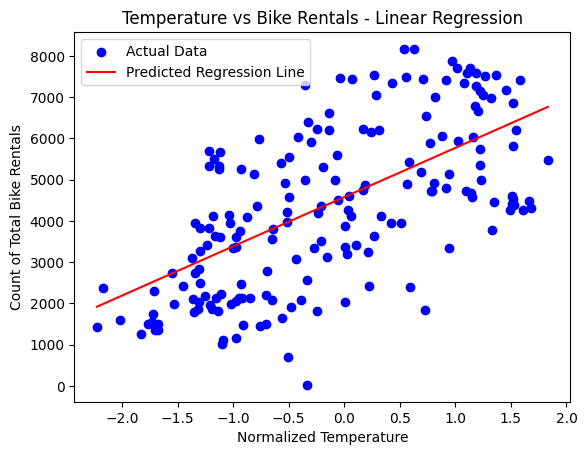

In [ ]:
# Print the intercept and slope of the model
print('Intercept:', model_bike.intercept_)
print('Slope:', model_bike.coef_[0])

# Plotting
plt.scatter(X_test_scaled_bike, Y_test_bike, color='blue', label='Actual Data')
# To plot the regression line, we need to sort the values since the scaling might have changed the order
sorted_idx = np.argsort(X_test_scaled_bike[:, 0])
plt.plot(X_test_scaled_bike[sorted_idx], Y_pred_bike[sorted_idx], color='red', label='Predicted Regression Line')
plt.title('Temperature vs Bike Rentals - Linear Regression')
plt.xlabel('Normalized Temperature')
plt.ylabel('Count of Total Bike Rentals')
plt.legend()
plt.show()